> pip install openpyxl

In [1]:
import pandas as pd

## Import du fichier Excel:

In [2]:
df_from_excel = pd.read_excel(
    'Data/inputs/20240409_df_results.xlsx',
    usecols=[
        'NCTId',
        'BriefTitle',
        'HasResults',
        'type',
        'pmid',
        'doi',
        'year',
        'type de publi',
        'oa',
        'étude avant 2013',
        'commentaire',
    ],
)

In [3]:
df_from_excel

,NCTId,BriefTitle,HasResults,type,pmid,doi,year,type de publi,oa,étude avant 2013,commentaire
0,NCT02014727,Safety and Immunogenicity of Recombinant Pichi...,False,DERIVED,28947345,10.1016/j.vaccine.2017.09.027,2017,publi,non,NaN,NaN
1,NCT00117494,Rosuvastatin Versus Pravastatin in HIV Patient...,False,DERIVED,22739396,10.1097/QAD.0b013e328357063c,2012,publi,non,oui,publi 2012 étude 2005-2011
2,NCT00117494,Rosuvastatin Versus Pravastatin in HIV Patient...,False,DERIVED,22318219,10.3851/IMP2065,2012,publi,oa,oui,publi 2012 étude 2005-2012
3,NCT00536627,Efficacy and Tolerance of Naked DNA Vaccine in...,False,DERIVED,24394187,10.1038/mt.2013.274,2014,publi,oa,oui,NaN
4,NCT00536627,Efficacy and Tolerance of Naked DNA Vaccine in...,False,BACKGROUND,15382173,10.1002/hep.20408,2004,background,oa,oui,background
...,...,...,...,...,...,...,...,...,...,...,...
492,NCT01688453,Overweight Management and Social Inequalities,False,PUBMED,35272723,10.1017/S136898002200057X,2023,publi,oa,NaN,NaN
493,NCT01688453,Overweight Management and Social Inequalities,False,DERIVED,29934380,10.1136/bmjopen-2017-019731,2018,publi,oa,NaN,NaN
494,NCT02658253,Trial to Evaluate the Safety and Immunogenicit...,False,DERIVED,33717176,10.3389/fimmu.2021.634508,2021,publi,oa,NaN,2016-2019
495,NCT02658253,Trial to Evaluate the Safety and Immunogenicit...,False,DERIVED,32032566,10.1016/S1473-3099(19)30739-X,2020,publi,oa,NaN,NaN


In [4]:
df_from_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NCTId             497 non-null    object
 1   BriefTitle        497 non-null    object
 2   HasResults        497 non-null    bool  
 3   type              497 non-null    object
 4   pmid              497 non-null    int64 
 5   doi               493 non-null    object
 6   year              497 non-null    int64 
 7   type de publi     444 non-null    object
 8   oa                442 non-null    object
 9   étude avant 2013  164 non-null    object
 10  commentaire       137 non-null    object
dtypes: bool(1), int64(2), object(8)
memory usage: 39.4+ KB


#### Suppression des espaces superflus dans la colonne 'type de publi' :

In [5]:
df_from_excel.loc[:, 'type de publi'] = df_from_excel.loc[:, 'type de publi'].str.strip()

#### Transformation de la colonne 'oa' en 'boolean' :

In [6]:
df_from_excel.loc[:, 'oa'].value_counts(dropna = False)

oa
oa     293
non    148
NaN     55
oui      1
Name: count, dtype: int64

In [7]:
mask = (df_from_excel['oa'] == 'oui')
df_from_excel.loc[mask, 'oa'] = 'oa'

In [8]:
df_from_excel.loc[:, 'oa'].value_counts(dropna = False)

oa
oa     294
non    148
NaN     55
Name: count, dtype: int64

In [9]:
df_from_excel.loc[:,'oa'] = df_from_excel.loc[:,'oa'].replace({'oa': True, 'non': False})

#### Transformation de la colonne 'étude avant 2013' en 'boolean' :

In [10]:
df_from_excel.loc[:, 'étude avant 2013'].value_counts(dropna = False)

étude avant 2013
NaN    333
oui    164
Name: count, dtype: int64

In [11]:
df_from_excel.loc[:,'étude avant 2013'] = df_from_excel.loc[:,'étude avant 2013'].replace({'oui': True})

In [12]:
df_from_excel.loc[:, 'étude avant 2013'].value_counts(dropna = False)

étude avant 2013
NaN     333
True    164
Name: count, dtype: int64

#### Résultat

In [77]:
df_from_excel = df_from_excel.astype(
    {
        'type': 'category',
        'type de publi': 'category',
        'oa': 'boolean',
        'étude avant 2013': 'boolean',
    }
)

In [14]:
df_from_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   NCTId             497 non-null    object  
 1   BriefTitle        497 non-null    object  
 2   HasResults        497 non-null    bool    
 3   type              497 non-null    category
 4   pmid              497 non-null    int64   
 5   doi               493 non-null    object  
 6   year              497 non-null    int64   
 7   type de publi     444 non-null    object  
 8   oa                442 non-null    boolean 
 9   étude avant 2013  164 non-null    boolean 
 10  commentaire       137 non-null    object  
dtypes: bool(1), boolean(2), category(1), int64(2), object(5)
memory usage: 30.4+ KB


In [15]:
df_from_excel

,NCTId,BriefTitle,HasResults,type,pmid,doi,year,type de publi,oa,étude avant 2013,commentaire
0,NCT02014727,Safety and Immunogenicity of Recombinant Pichi...,False,DERIVED,28947345,10.1016/j.vaccine.2017.09.027,2017,publi,False,<NA>,NaN
1,NCT00117494,Rosuvastatin Versus Pravastatin in HIV Patient...,False,DERIVED,22739396,10.1097/QAD.0b013e328357063c,2012,publi,False,True,publi 2012 étude 2005-2011
2,NCT00117494,Rosuvastatin Versus Pravastatin in HIV Patient...,False,DERIVED,22318219,10.3851/IMP2065,2012,publi,True,True,publi 2012 étude 2005-2012
3,NCT00536627,Efficacy and Tolerance of Naked DNA Vaccine in...,False,DERIVED,24394187,10.1038/mt.2013.274,2014,publi,True,True,NaN
4,NCT00536627,Efficacy and Tolerance of Naked DNA Vaccine in...,False,BACKGROUND,15382173,10.1002/hep.20408,2004,background,True,True,background
...,...,...,...,...,...,...,...,...,...,...,...
492,NCT01688453,Overweight Management and Social Inequalities,False,PUBMED,35272723,10.1017/S136898002200057X,2023,publi,True,<NA>,NaN
493,NCT01688453,Overweight Management and Social Inequalities,False,DERIVED,29934380,10.1136/bmjopen-2017-019731,2018,publi,True,<NA>,NaN
494,NCT02658253,Trial to Evaluate the Safety and Immunogenicit...,False,DERIVED,33717176,10.3389/fimmu.2021.634508,2021,publi,True,<NA>,2016-2019
495,NCT02658253,Trial to Evaluate the Safety and Immunogenicit...,False,DERIVED,32032566,10.1016/S1473-3099(19)30739-X,2020,publi,True,<NA>,NaN


## Verification du status Open Access via l'API d'Unpaywall:

In [16]:
# To query Unpaywall API, we need the DOI
# Not smart to query Pubmed, better to keep it the excel file we exported in the previous notebook 

In [17]:
import requests

Ne pas oublier que le DOI peut être vide :

In [18]:
df_from_excel.loc[df_from_excel.loc[:, 'doi'].isna()]

,NCTId,BriefTitle,HasResults,type,pmid,doi,year,type de publi,oa,étude avant 2013,commentaire
237,NCT00196625,"Salvage Therapy With Amprenavir, Lopinavir and...",False,RESULT,15456093,NaN,2004,publi,False,True,2000-2002
258,NCT03537196,DRug Use & Infections in ViEtnam - Hepatitis C...,False,BACKGROUND,19839502,NaN,2009,background,True,<NA>,NaN
452,NCT00158509,Randomised Controlled Trial Assessing the Impa...,False,RESULT,16044019,NaN,2005,NaN,<NA>,True,NaN
482,NCT00463983,Treatment of Idiopathic Pulmonary Fibrosis Wit...,False,BACKGROUND,16883006,NaN,2006,background,True,True,NaN


#### Envoi de la requête :

In [19]:
import json

In [20]:
counter = 0  # To keep track of progress
dois = df_from_excel.loc[:, 'doi']
num_dois = len(dois)
email = 'julien.bacquart@inserm.fr'
session = requests.Session()

# TODO: Use dictionnary ? {'NCTId': ..., 'doi': ..., 'is_oa': ...}
is_oa_list = []
for doi in dois:
    # Display the progress on a single line
    print(f'\r{counter+1} / {num_dois}...', end='', flush=True)

    # Test if DOI is NaN
    if pd.isna(doi):
        # Add to the list (NaN, NaN)
        is_oa_list.append((doi, doi))
    else:
        # Query Unpaywall's API
        query_url = f'https://api.unpaywall.org/v2/{doi}?email={email}'
        response = session.get(query_url)
        response.raise_for_status()
    
        # Add to the list ('doi', 'is_oa')
        is_oa_list.append((doi, response.json()['is_oa']))

    counter += 1
# is_oa_list

497 / 497...

In [21]:
df_is_oa = pd.DataFrame(is_oa_list, columns=['doi', 'is_oa'])
df_is_oa

,doi,is_oa
0,10.1016/j.vaccine.2017.09.027,False
1,10.1097/QAD.0b013e328357063c,True
2,10.3851/IMP2065,False
3,10.1038/mt.2013.274,True
4,10.1002/hep.20408,False
...,...,...
492,10.1017/S136898002200057X,True
493,10.1136/bmjopen-2017-019731,True
494,10.3389/fimmu.2021.634508,True
495,10.1016/S1473-3099(19)30739-X,True


On incorpore les données d'Unpaywall dans notre dataframe: 

In [22]:
df_with_oa_status = df_from_excel.join(df_is_oa.loc[:, 'is_oa'])
df_with_oa_status.loc[:, ['NCTId', 'pmid', 'doi', 'oa', 'is_oa']]

,NCTId,pmid,doi,oa,is_oa
0,NCT02014727,28947345,10.1016/j.vaccine.2017.09.027,False,False
1,NCT00117494,22739396,10.1097/QAD.0b013e328357063c,False,True
2,NCT00117494,22318219,10.3851/IMP2065,True,False
3,NCT00536627,24394187,10.1038/mt.2013.274,True,True
4,NCT00536627,15382173,10.1002/hep.20408,True,False
...,...,...,...,...,...
492,NCT01688453,35272723,10.1017/S136898002200057X,True,True
493,NCT01688453,29934380,10.1136/bmjopen-2017-019731,True,True
494,NCT02658253,33717176,10.3389/fimmu.2021.634508,True,True
495,NCT02658253,32032566,10.1016/S1473-3099(19)30739-X,True,True


Cas où le traitement humain et automatisé diffèrent :

In [23]:
mask_oa_diff = (df_with_oa_status['oa'] != df_with_oa_status['is_oa'])
df_oa_diff = df_with_oa_status.loc[mask_oa_diff, ['pmid', 'doi', 'oa', 'is_oa']].drop_duplicates()
df_oa_diff

,pmid,doi,oa,is_oa
1,22739396,10.1097/QAD.0b013e328357063c,False,True
2,22318219,10.3851/IMP2065,True,False
4,15382173,10.1002/hep.20408,True,False
5,24555998,10.1136/gutjnl-2013-305707,True,False
15,21486976,10.1001/jama.2011.351,True,False
...,...,...,...,...
470,17545707,10.1097/QAD.0b013e32814e6b1c,False,True
475,33873195,10.1159/000515669,False,True
485,32822634,10.1016/S1474-4422(20)30235-0,False,True
489,32097754,10.1016/j.ypmed.2020.106043,False,True


#### Faux négatifs :

In [24]:
num_false_negative = len(
    df_oa_diff.loc[
        (df_oa_diff['oa'] == True) & (df_oa_diff['is_oa'] == False)
    ]
)
print(f'Nombre de faux négatifs: {num_false_negative}')

Nombre de faux négatifs: 20


#### Faux positifs :

In [25]:
num_false_positive = len(
    df_oa_diff.loc[
        (df_oa_diff['oa'] == False) & (df_oa_diff['is_oa'] == True)
    ]
)
print(f'Nombre de faux positifs: {num_false_positive}')

Nombre de faux positifs: 54


On trouve un nombre important où le traitement humain et automatisé diffèrent.

#### Export vers un CSV pour une vérification manuelle :

In [26]:
df_oa_diff.to_csv(
    'Data/outputs/df_oa_diff.csv',
    sep=';',
    index=False,
    encoding='utf-8-sig',
)

### Import du fichier Excel corrigé :

In [27]:
df_oa_corrected = pd.read_excel(
    'Data/inputs/20240503_df_oa_diff.xlsx',
)
df_oa_corrected

C:\Users\julien.bacquart\Development\BSO-Inserm-Sante\venv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,pmid,doi,link,oa,is_oa,human_is_right,comment
0,22739396,10.1097/QAD.0b013e328357063c,10.1097/QAD.0b013e328357063c,False,True,True,NaN
1,22318219,10.3851/IMP2065,10.3851/IMP2065,True,False,True,NaN
2,15382173,10.1002/hep.20408,10.1002/hep.20408,True,False,True,NaN
3,24555998,10.1136/gutjnl-2013-305707,10.1136/gutjnl-2013-305707,True,False,False,NaN
4,21486976,10.1001/jama.2011.351,10.1001/jama.2011.351,True,False,False,NaN
...,...,...,...,...,...,...,...
77,17545707,10.1097/QAD.0b013e32814e6b1c,10.1097/QAD.0b013e32814e6b1c,False,True,True,NaN
78,33873195,10.1159/000515669,10.1159/000515669,False,True,False,NaN
79,32822634,10.1016/S1474-4422(20)30235-0,10.1016/S1474-4422(20)30235-0,False,True,False,oa repository
80,32097754,10.1016/j.ypmed.2020.106043,10.1016/j.ypmed.2020.106043,False,True,False,NaN


In [28]:
df_oa_corrected.loc[:, 'human_is_right'].value_counts()

human_is_right
False    45
True     37
Name: count, dtype: int64

In [29]:
mask_human_is_right = (df_oa_corrected.loc[:, 'human_is_right'] == True)

#### Faux négatifs :

In [30]:
mask_false_negative = mask_human_is_right & (df_oa_corrected.loc[:, 'is_oa'] == False)

num_false_negative = len(df_oa_corrected.loc[mask_false_negative])
print(f'Nombre de faux négatifs: {num_false_negative}')

Nombre de faux négatifs: 16


#### Faux positifs :

In [31]:
mask_false_positive = mask_human_is_right & (df_oa_corrected.loc[:, 'is_oa'] == True)

num_false_positive = len(df_oa_corrected.loc[mask_false_positive])
print(f'Nombre de faux positifs: {num_false_positive}')

Nombre de faux positifs: 21


#### Taux d'erreur:

In [32]:
# TODO: should drop duplicates in df_from_excel to be more accurate
print(
    f"Taux d'erreur d'Unpaywall:  {len(df_oa_corrected.loc[mask_human_is_right])}/{len(df_from_excel)} ({len(df_oa_corrected.loc[mask_human_is_right]) / len(df_from_excel):.2%})"
)

Taux d'erreur d'Unpaywall:  37/497 (7.44%)


### On copie les données corrigées dans la dataframe originale :

In [79]:
# Copy the corrected data in the original dataframe
df_iter = df_oa_corrected.loc[:, ['pmid', 'is_oa', 'human_is_right']]
df_from_excel_corrected = df_from_excel.copy()

for pmid, is_oa, human_is_right in df_iter.itertuples(index=False):
    if (not human_is_right):
        df_from_excel_corrected.loc[df_from_excel_corrected.loc[:, 'pmid'] == pmid, 'oa'] = is_oa
df_from_excel_corrected

,NCTId,BriefTitle,HasResults,type,pmid,doi,year,type de publi,oa,étude avant 2013,commentaire
0,NCT02014727,Safety and Immunogenicity of Recombinant Pichi...,False,DERIVED,28947345,10.1016/j.vaccine.2017.09.027,2017,publi,False,<NA>,NaN
1,NCT00117494,Rosuvastatin Versus Pravastatin in HIV Patient...,False,DERIVED,22739396,10.1097/QAD.0b013e328357063c,2012,publi,False,True,publi 2012 étude 2005-2011
2,NCT00117494,Rosuvastatin Versus Pravastatin in HIV Patient...,False,DERIVED,22318219,10.3851/IMP2065,2012,publi,True,True,publi 2012 étude 2005-2012
3,NCT00536627,Efficacy and Tolerance of Naked DNA Vaccine in...,False,DERIVED,24394187,10.1038/mt.2013.274,2014,publi,True,True,NaN
4,NCT00536627,Efficacy and Tolerance of Naked DNA Vaccine in...,False,BACKGROUND,15382173,10.1002/hep.20408,2004,background,True,True,background
...,...,...,...,...,...,...,...,...,...,...,...
492,NCT01688453,Overweight Management and Social Inequalities,False,PUBMED,35272723,10.1017/S136898002200057X,2023,publi,True,<NA>,NaN
493,NCT01688453,Overweight Management and Social Inequalities,False,DERIVED,29934380,10.1136/bmjopen-2017-019731,2018,publi,True,<NA>,NaN
494,NCT02658253,Trial to Evaluate the Safety and Immunogenicit...,False,DERIVED,33717176,10.3389/fimmu.2021.634508,2021,publi,True,<NA>,2016-2019
495,NCT02658253,Trial to Evaluate the Safety and Immunogenicit...,False,DERIVED,32032566,10.1016/S1473-3099(19)30739-X,2020,publi,True,<NA>,NaN


In [34]:
# TODO: incorporate back the corrected data in the original Excel file ?

## Correlation entre le 'type' ClinicalTrial et la nature de la publication : 

In [58]:
df_from_excel_corrected.loc[:, 'type'].value_counts(dropna=False)

type
DERIVED       260
RESULT        119
BACKGROUND     90
PUBMED         28
Name: count, dtype: int64

In [57]:
df_from_excel_corrected.loc[:, 'type de publi'].value_counts(dropna=False)

type de publi
publi                 302
background             88
NaN                    53
résultats négatifs     29
protocole              22
commentaire             2
méta analyse            1
Name: count, dtype: int64

In [43]:
df_from_excel_corrected.loc[:, ['type','type de publi']]

,type,type de publi
0,DERIVED,publi
1,DERIVED,publi
2,DERIVED,publi
3,DERIVED,publi
4,BACKGROUND,background
...,...,...
492,PUBMED,publi
493,DERIVED,publi
494,DERIVED,publi
495,DERIVED,publi


### Pivot tables :

In [163]:
df_correlation = pd.pivot_table(
    df_from_excel_corrected,
    index='type de publi',
    columns='type',
    aggfunc='size',
    observed=False,
)
df_correlation

type,BACKGROUND,DERIVED,PUBMED,RESULT
type de publi,,,,
background,72,3,0,13
commentaire,1,1,0,0
méta analyse,1,0,0,0
protocole,6,14,1,1
publi,10,179,25,88
résultats négatifs,0,22,2,5


In [164]:
df_correlation_perc = pd.crosstab(
    index = df_from_excel_corrected.loc[:,'type de publi'],
    columns= df_from_excel_corrected.loc[:,'type'],
    normalize= 'columns',
    # aggfunc='size',
    # fill_value=0,
    # observed=False,
)
df_correlation_perc

type,BACKGROUND,DERIVED,PUBMED,RESULT
type de publi,,,,
background,0.800000,0.013699,0.000000,0.121495
commentaire,0.011111,0.004566,0.000000,0.000000
méta analyse,0.011111,0.000000,0.000000,0.000000
protocole,0.066667,0.063927,0.035714,0.009346
publi,0.111111,0.817352,0.892857,0.822430
résultats négatifs,0.000000,0.100457,0.071429,0.046729


### Heatmaps :

In [166]:
import seaborn as sns

<Axes: xlabel='type', ylabel='type de publi'>

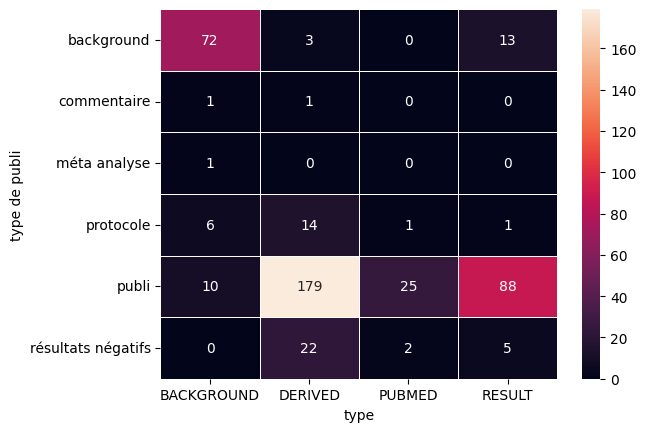

In [170]:
sns.heatmap(
    df_correlation, 
    annot = True,
    linewidth=.4,
    fmt = 'd'
)

<Axes: xlabel='type', ylabel='type de publi'>

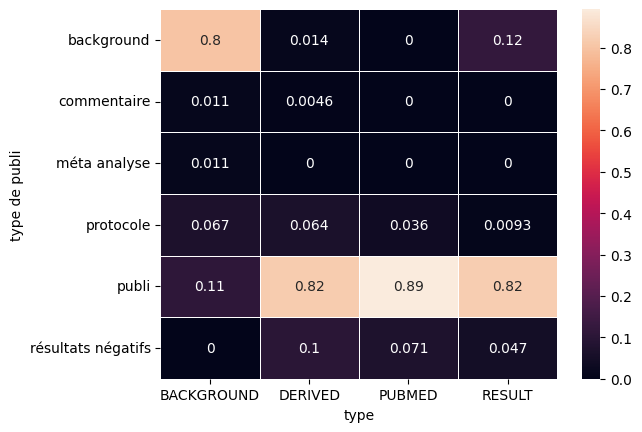

In [168]:
sns.heatmap(
    df_correlation_perc, 
    annot = True,
    linewidth=.4,
)